In [49]:
import pandas as pd

df = pd.read_excel("heart_failure_clinical_records_dataset.xlsx")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
import pandas as pd

df = pd.read_excel("heart_failure_clinical_records_dataset.xlsx")

df.drop_duplicates(inplace=True)
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_excel("heart_failure_clinical_records_dataset.xlsx")

print(df.info())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(-1)

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv("X.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("Y.csv", index=False)
y_test.to_csv("Y_test.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    "LinearRegression": LinearRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "ANN": MLPClassifier(max_iter=1000)
}

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

models = {
    "LinearRegression": LinearRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "ANN": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        if name == "LinearRegression":
            predictions = [1 if p >= 0.5 else 0 for p in predictions]  # تحويل لتصنيف

        acc = accuracy_score(y_test, predictions)
        print(f"{name}: Accuracy = {acc:.4f}")
    except Exception as e:
        print(f"{name}: Failed - {e}")
        

LinearRegression: Accuracy = 0.8000
SVM: Accuracy = 0.5833
RandomForest: Accuracy = 0.7500
DecisionTree: Accuracy = 0.6500
KNN: Accuracy = 0.5333
NaiveBayes: Accuracy = 0.7333
ANN: Accuracy = 0.5833


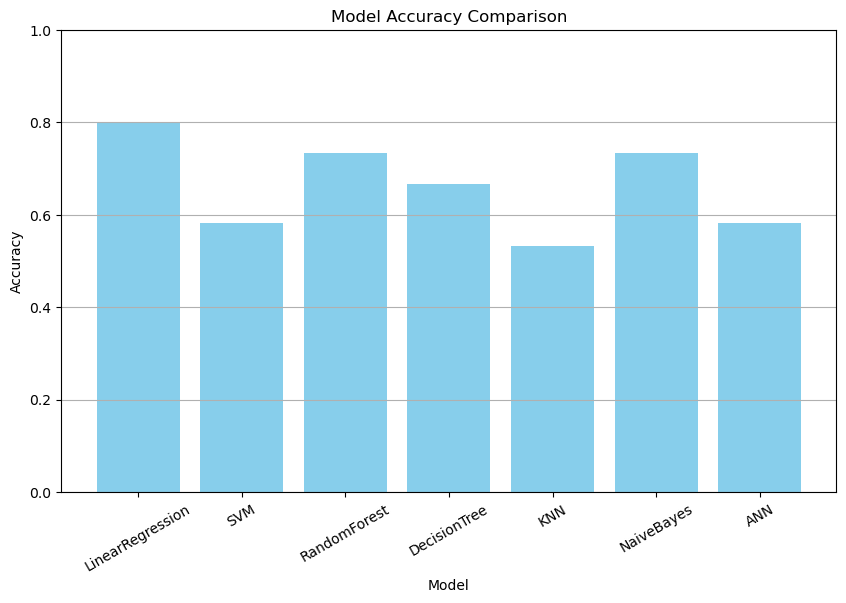

In [21]:
import matplotlib.pyplot as plt

model_names = ['LinearRegression', 'SVM', 'RandomForest', 'DecisionTree', 'KNN', 'NaiveBayes', 'ANN']
accuracies = [0.8000, 0.5833, 0.7333, 0.6667, 0.5333, 0.7333, 0.5833]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


In [23]:
import pandas as pd

data = {'Model': model_names, 'Accuracy': accuracies}
df_acc = pd.DataFrame(data)
print(df_acc)

              Model  Accuracy
0  LinearRegression    0.8000
1               SVM    0.5833
2      RandomForest    0.7333
3      DecisionTree    0.6667
4               KNN    0.5333
5        NaiveBayes    0.7333
6               ANN    0.5833


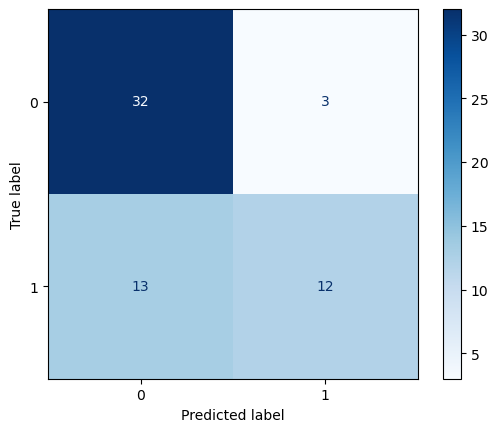

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

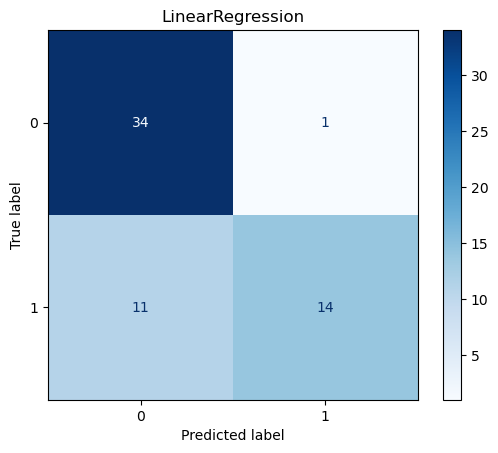

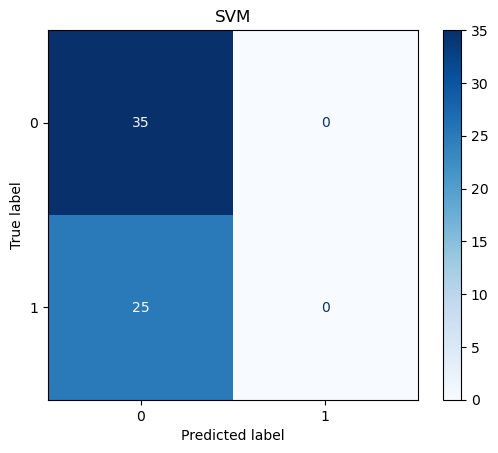

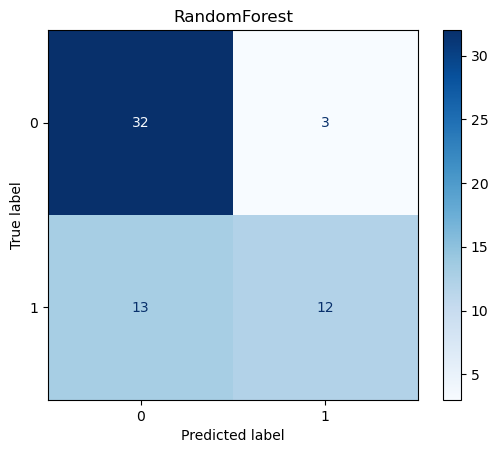

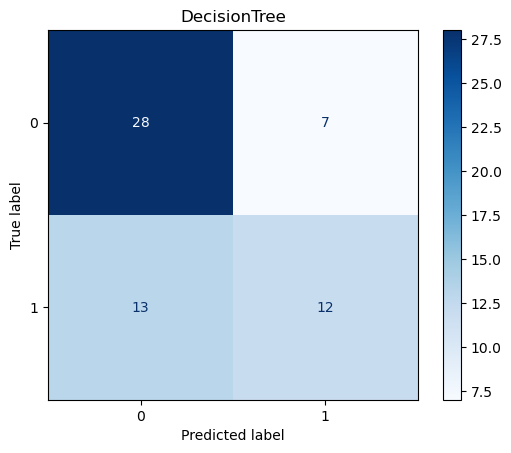

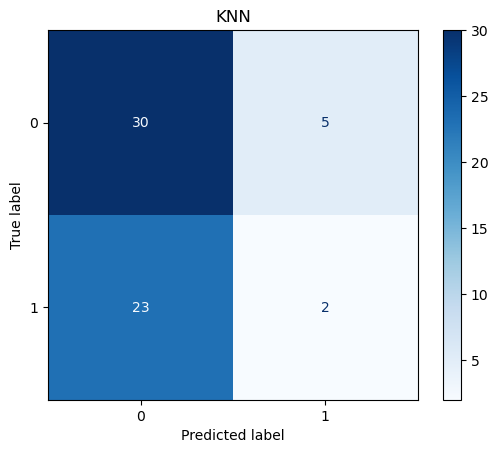

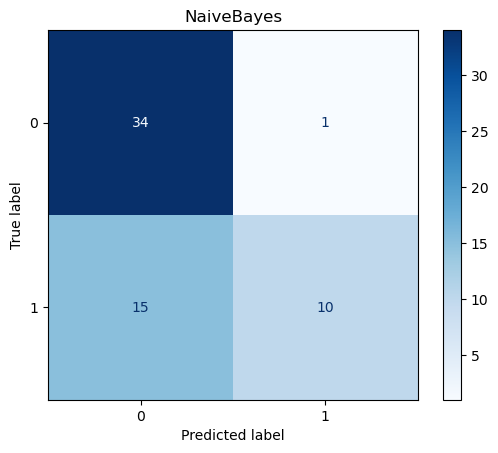

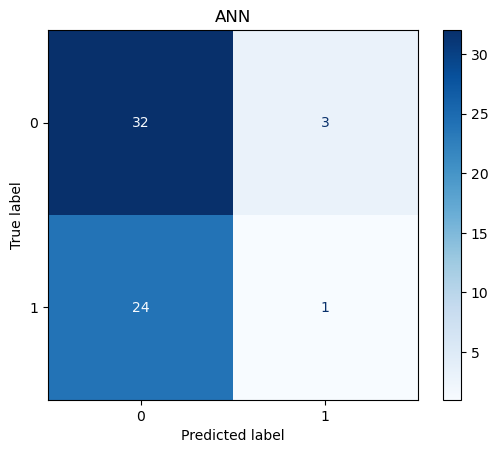

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

models = {
    "LinearRegression": LinearRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "ANN": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    if name == "LinearRegression":
        preds = [1 if p >= 0.5 else 0 for p in preds]

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(name)
    plt.show()

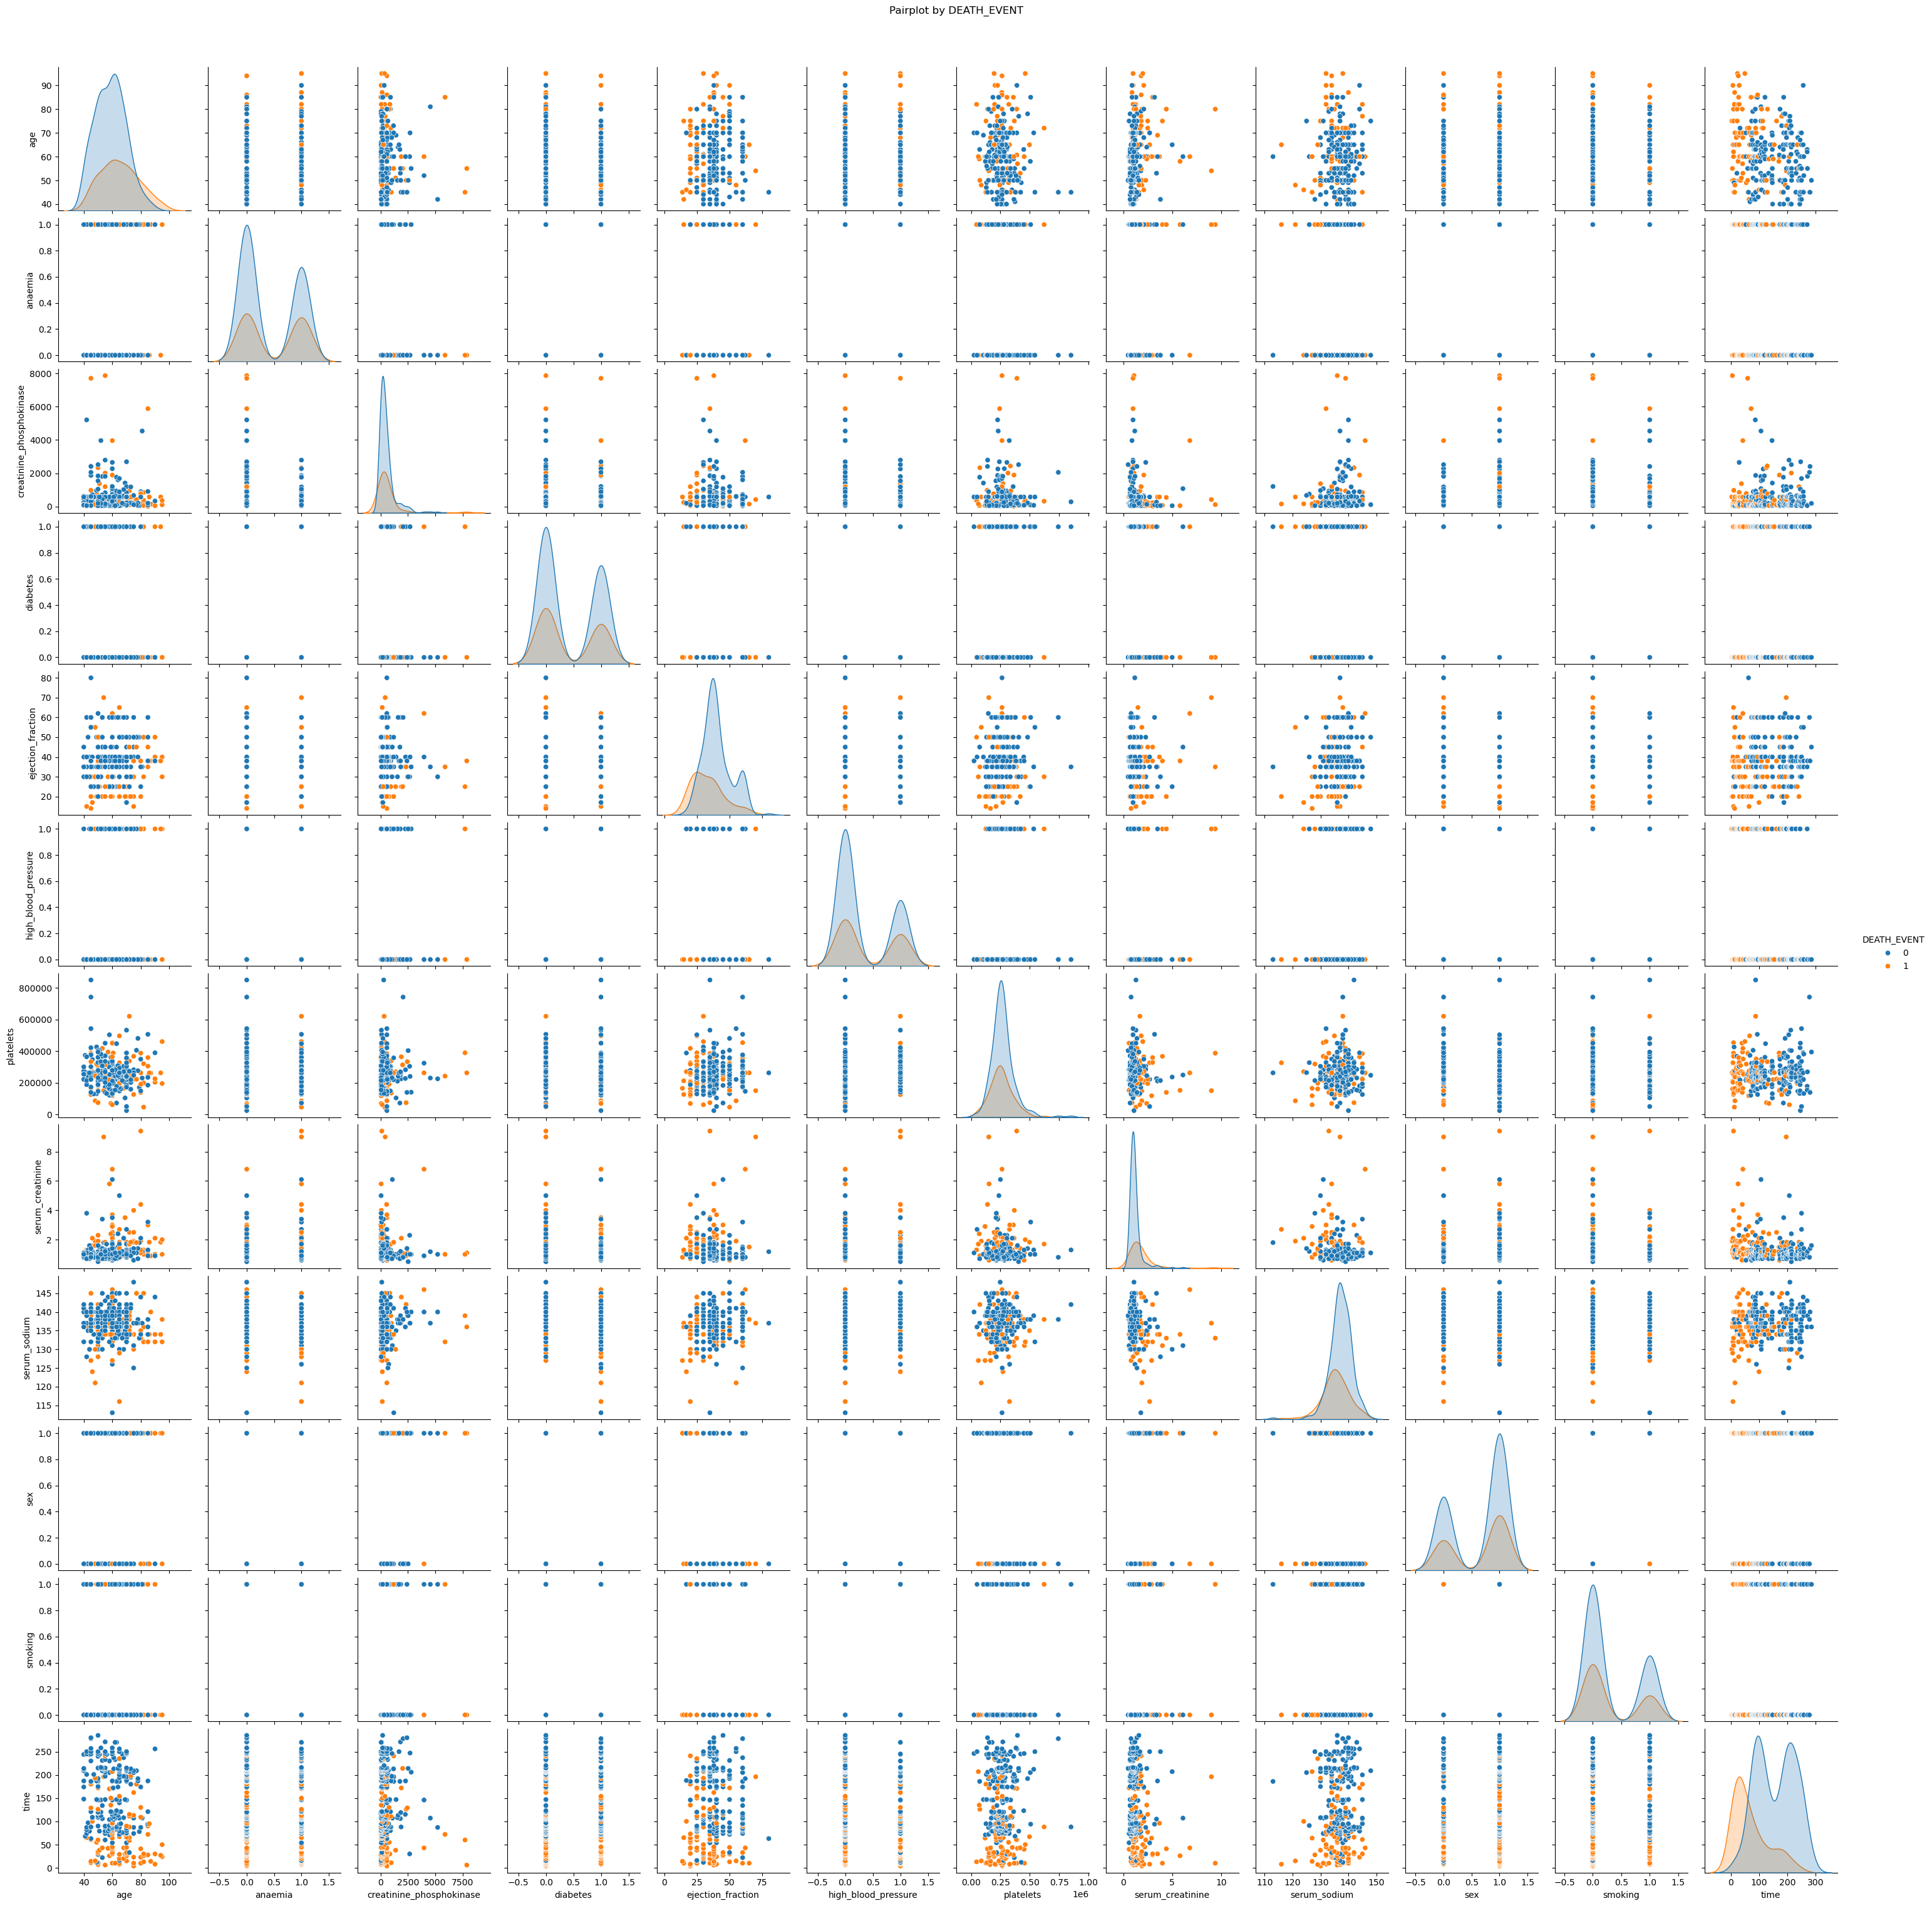

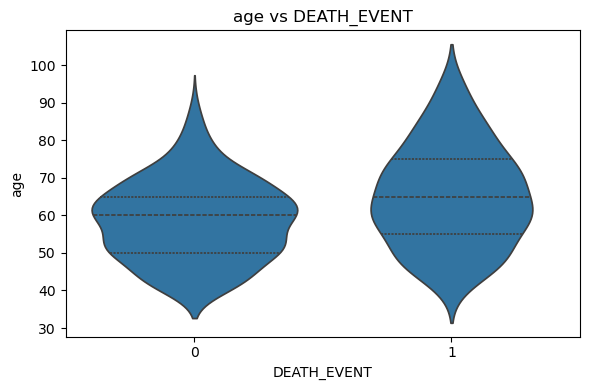

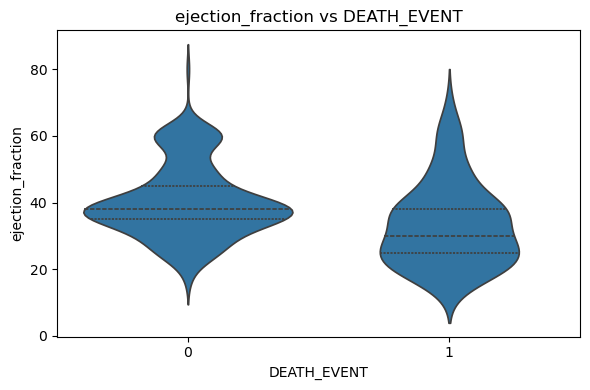

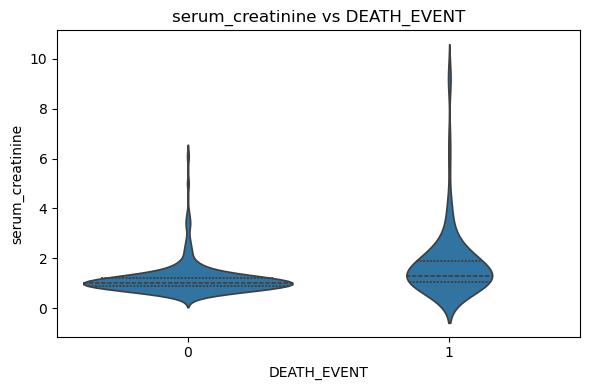

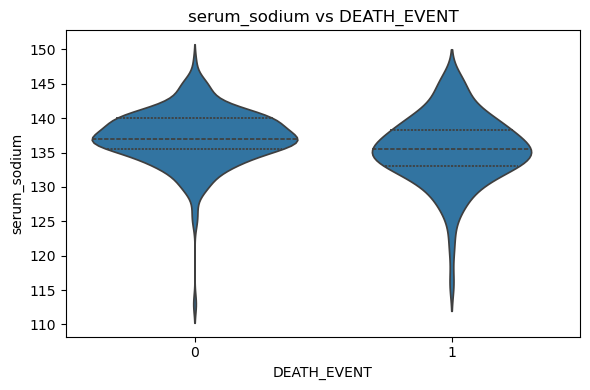

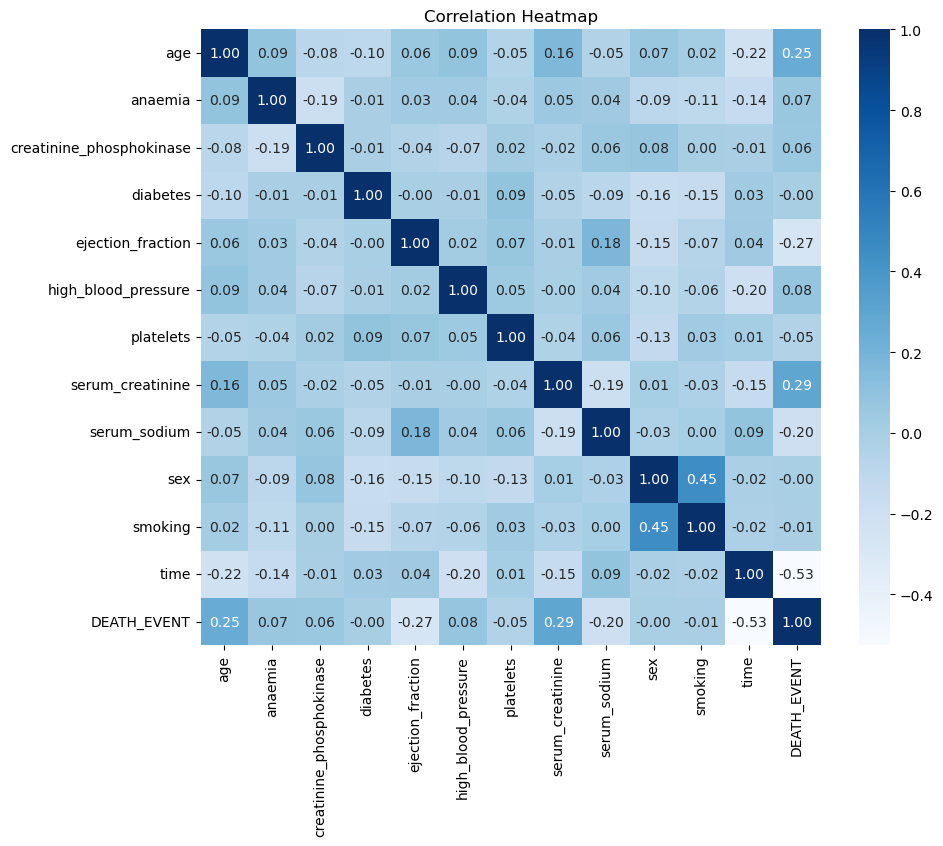

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.pairplot(df, hue='DEATH_EVENT')
plt.suptitle("Pairplot by DEATH_EVENT", y=1.02)
plt.show()


features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='DEATH_EVENT', y=col, data=df, inner='quartile')
    plt.title(f'{col} vs DEATH_EVENT')
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [31]:
sns.pairplot(df, hue='DEATH_EVENT')
plt.suptitle("Pairplot by DEATH_EVENT", y=1.02)
plt.savefig("pairplot.png")
plt.close()

features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='DEATH_EVENT', y=col, data=df, inner='quartile')
    plt.title(f'{col} vs DEATH_EVENT')
    plt.tight_layout()
    plt.savefig(f"{col}_violin.png")
    plt.close()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.close()

In [33]:
plt.savefig("model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [35]:
plt.savefig(f"{name}_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

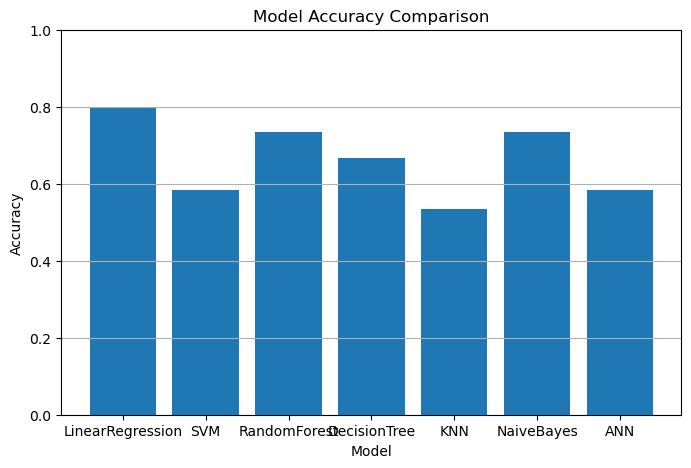

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')


plt.savefig("model_accuracy.png", dpi=300, bbox_inches='tight')


plt.show()

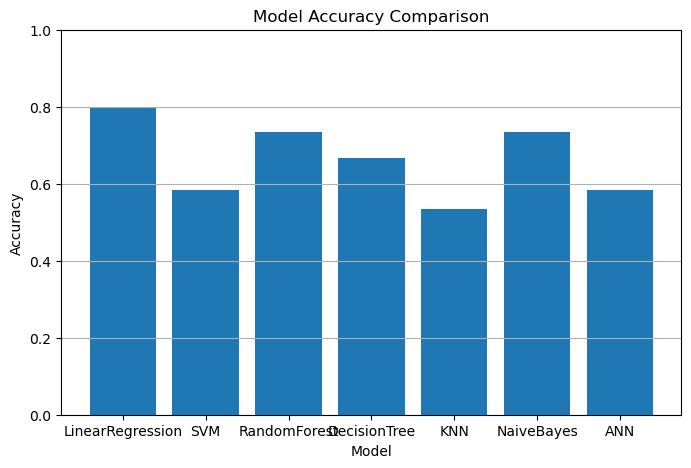

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.savefig("model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

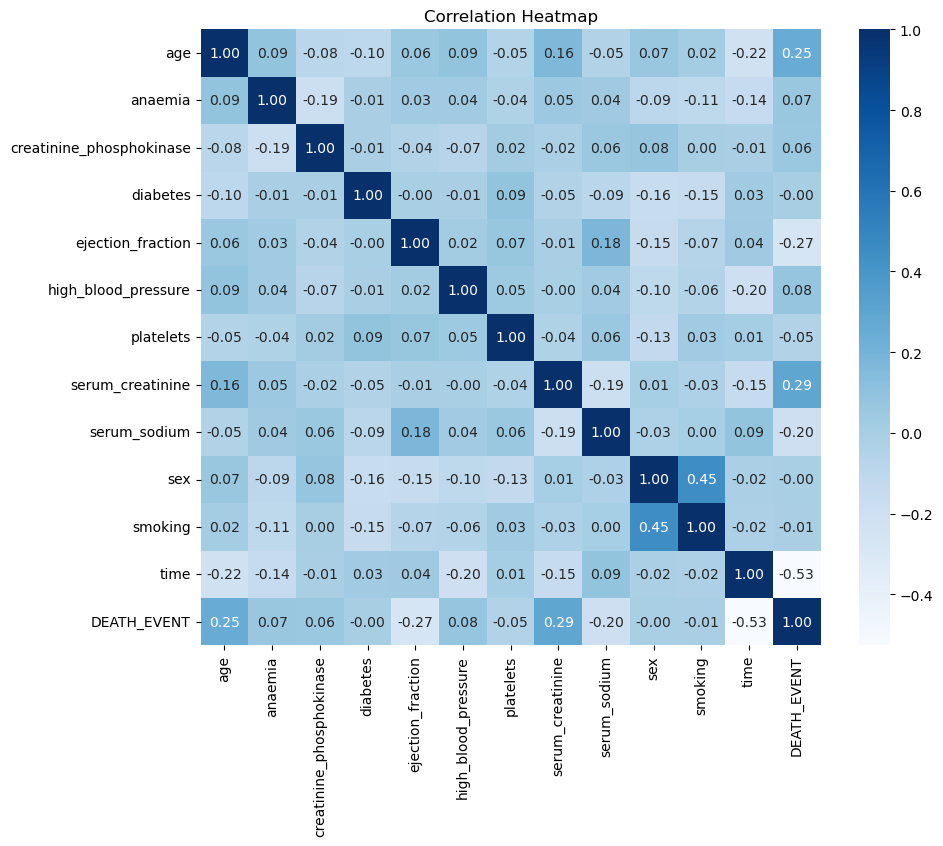

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


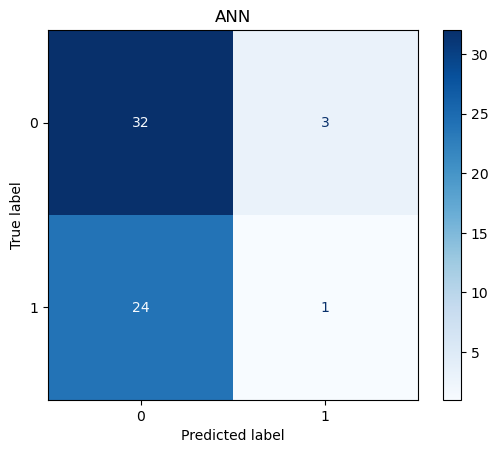

In [43]:
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(name)
plt.savefig(f"{name}_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


LinearRegression: Accuracy = 0.8000


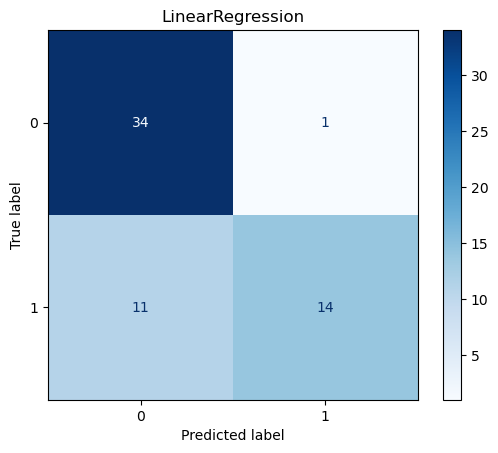

SVM: Accuracy = 0.5833


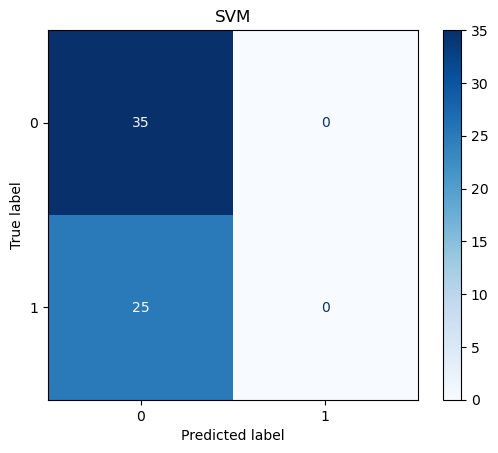

RandomForest: Accuracy = 0.7333


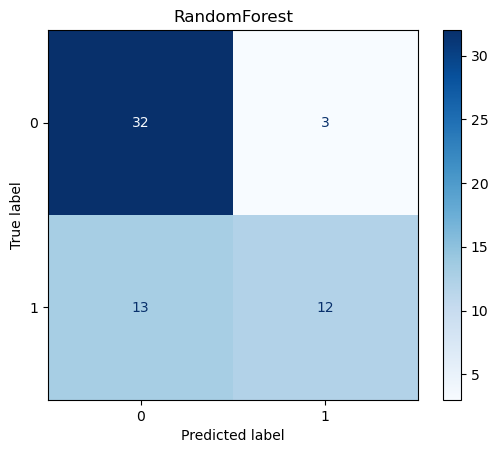

DecisionTree: Accuracy = 0.6500


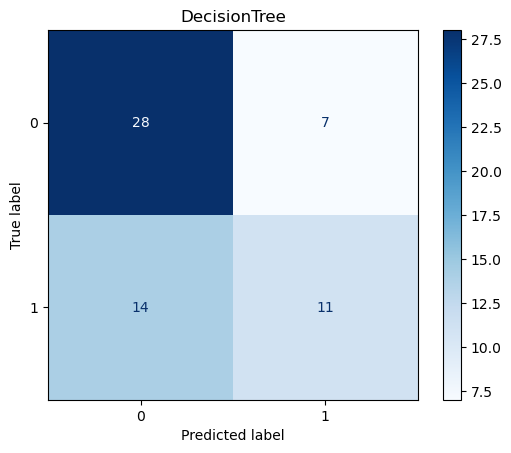

KNN: Accuracy = 0.5333


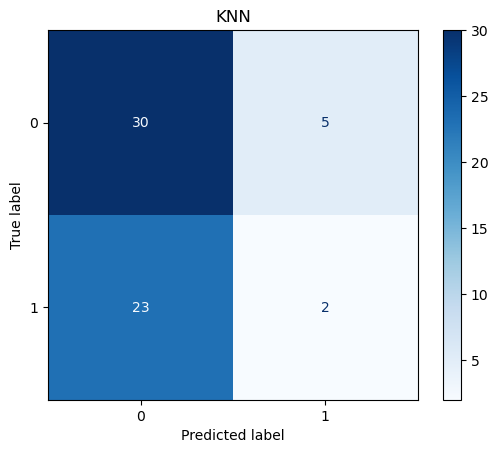

NaiveBayes: Accuracy = 0.7333


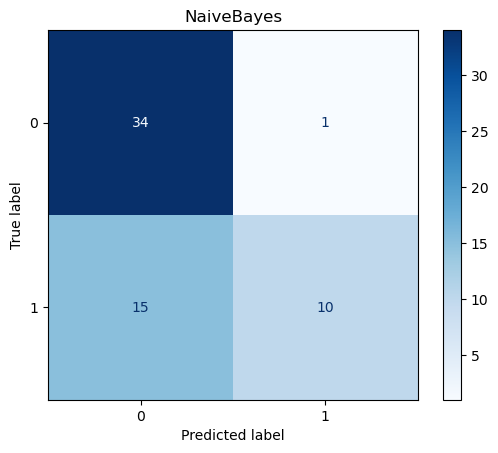

ANN: Accuracy = 0.5833


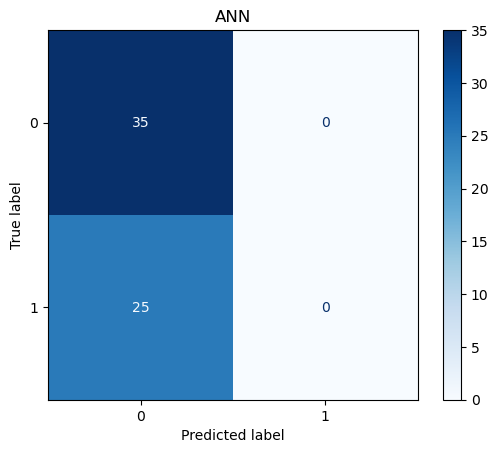

In [45]:
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        if name == "LinearRegression":
            preds = [1 if p >= 0.5 else 0 for p in preds]

        acc = accuracy_score(y_test, preds)
        print(f"{name}: Accuracy = {acc:.4f}")

        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(name)
        plt.savefig(f"{name}_confusion_matrix.png", dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"{name}: Failed - {e}")

In [69]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_SVM = model_svm.predict(X_test)
pd.DataFrame(y_pred_SVM).to_csv("predictions_SVM_model.csv", index=False)


model_ann = MLPClassifier(max_iter=1000)
model_ann.fit(X_train, y_train)
y_pred_ANN = model_ann.predict(X_test)
pd.DataFrame(y_pred_ANN).to_csv("predictions_ANN_model.csv", index=False)


model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_KNN = model_knn.predict(X_test)
pd.DataFrame(y_pred_KNN).to_csv("predictions_KNN_model.csv", index=False)


model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_DT = model_dt.predict(X_test)
pd.DataFrame(y_pred_DT).to_csv("predictions_DT_model.csv", index=False)

In [79]:
from sklearn.linear_model import LinearRegression
import pandas as pd

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_LR = model_lr.predict(X_test)
y_pred_LR = [1 if val >= 0.5 else 0 for val in y_pred_LR]

pd.DataFrame(y_pred_LR).to_csv("predictions_LR_model.csv", index=False)